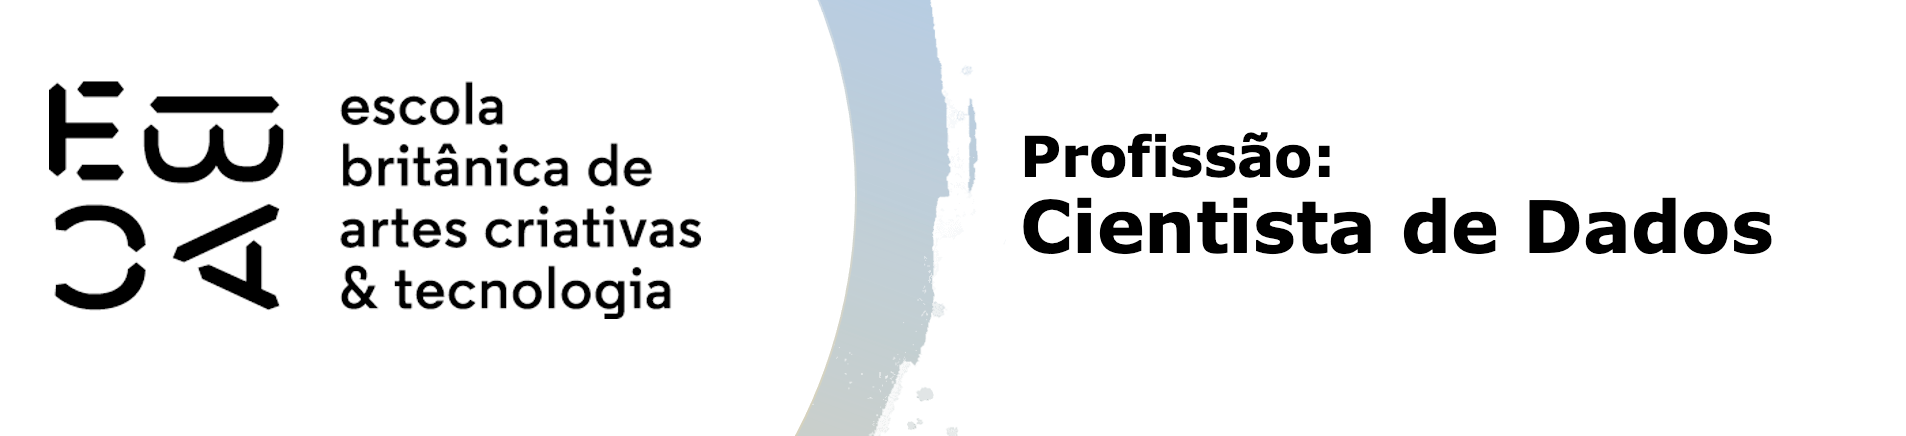

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

PROPORÇÃO DE NOTAS COM RETORNO > 0 POR CATEGORIA
Período: janeiro de 2020 em diante
   Categoria  Percentual_Retorno_Positivo
Restaurantes                    74.621386
   Alimentos                    68.158416
     Mercado                    47.815516
  Construção                    46.881037
não definido                    36.339436
    Farmácia                    35.155560
  Auto posto                    25.000000
   Vestuário                    23.072917
      Varejo                    13.837347

ESTATÍSTICAS RESUMIDAS:
Total de categorias analisadas: 9
Média de retorno positivo: 41.21%
Categoria com maior retorno: Restaurantes (74.62%)
Categoria com menor retorno: Varejo (13.84%)


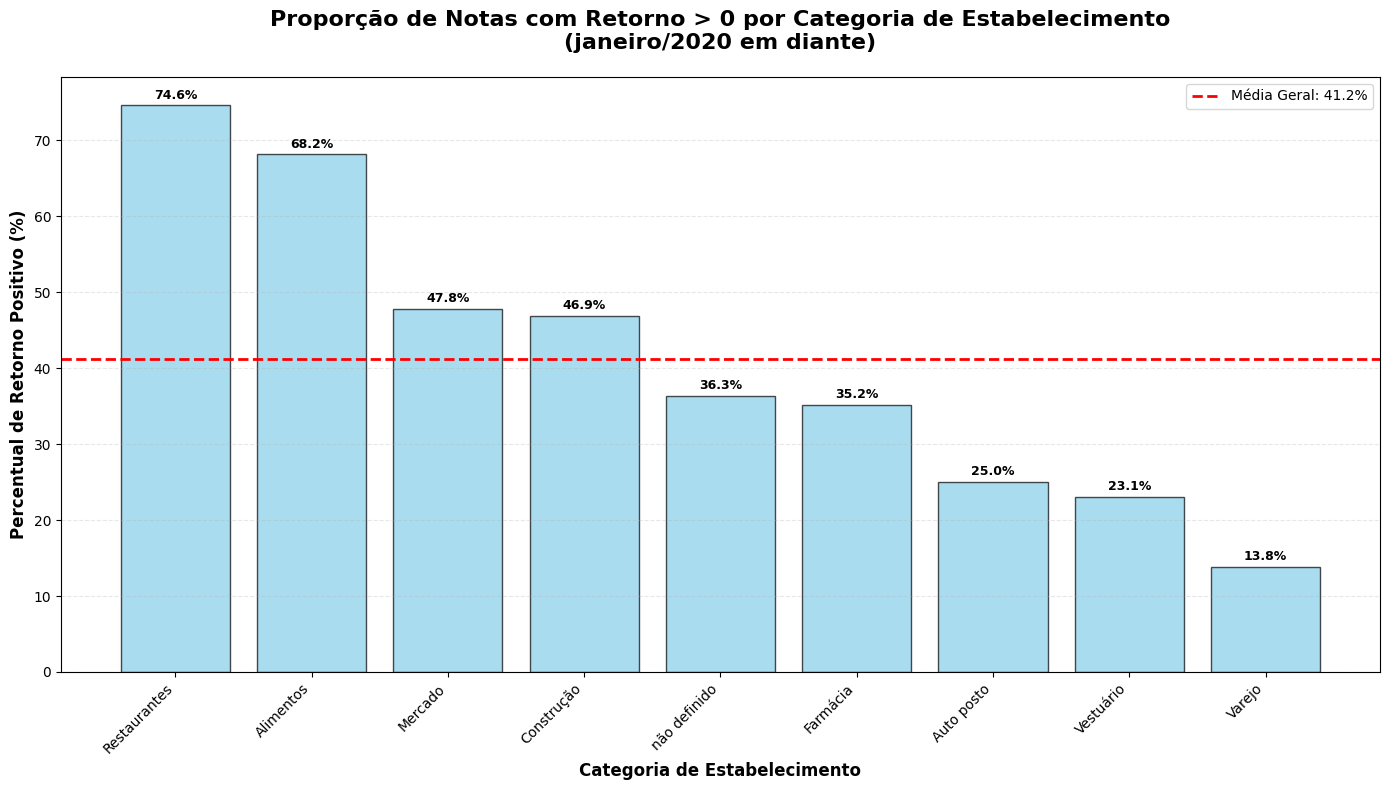

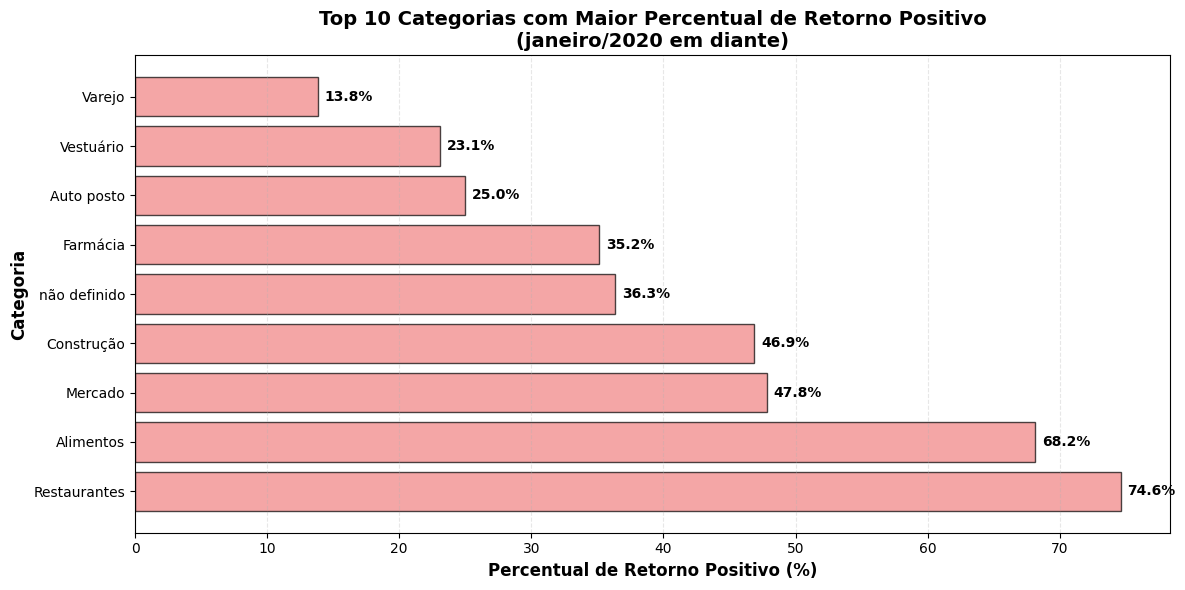


TOTAL DE NOTAS POR CATEGORIA (janeiro/2020 em diante):
   categoria  Total_Notas
     Mercado        27558
não definido        18407
  Construção        16047
    Farmácia        10189
      Varejo         5066
   Alimentos         5050
Restaurantes         2179
   Vestuário         1920
  Auto posto          540

ANÁLISE COMPLETA:
   Categoria  Percentual_Retorno_Positivo  Total_Notas
Restaurantes                    74.621386         2179
   Alimentos                    68.158416         5050
     Mercado                    47.815516        27558
  Construção                    46.881037        16047
não definido                    36.339436        18407
    Farmácia                    35.155560        10189
  Auto posto                    25.000000          540
   Vestuário                    23.072917         1920
      Varejo                    13.837347         5066


In [4]:
import seaborn as sns

df = pd.read_pickle('base_nfp.pkl')

df = df[df['Data Emissão'] >= '2020-01-01']

resultados = df.groupby('categoria')['Retorno'].apply(
    lambda x: (x > 0).mean() * 100
).reset_index()

resultados.columns = ['Categoria', 'Percentual_Retorno_Positivo']

resultados = resultados.sort_values('Percentual_Retorno_Positivo', ascending=False)

print("PROPORÇÃO DE NOTAS COM RETORNO > 0 POR CATEGORIA")
print("Período: janeiro de 2020 em diante")
print("=" * 65)
print(resultados.to_string(index=False))
print("=" * 65)

print(f"\nESTATÍSTICAS RESUMIDAS:")
print(f"Total de categorias analisadas: {len(resultados)}")
print(f"Média de retorno positivo: {resultados['Percentual_Retorno_Positivo'].mean():.2f}%")
print(f"Categoria com maior retorno: {resultados.iloc[0]['Categoria']} ({resultados.iloc[0]['Percentual_Retorno_Positivo']:.2f}%)")
print(f"Categoria com menor retorno: {resultados.iloc[-1]['Categoria']} ({resultados.iloc[-1]['Percentual_Retorno_Positivo']:.2f}%)")

plt.figure(figsize=(14, 8))
bars = plt.bar(resultados['Categoria'], resultados['Percentual_Retorno_Positivo'],
               color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Proporção de Notas com Retorno > 0 por Categoria de Estabelecimento\n(janeiro/2020 em diante)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoria de Estabelecimento', fontsize=12, fontweight='bold')
plt.ylabel('Percentual de Retorno Positivo (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

media_geral = resultados['Percentual_Retorno_Positivo'].mean()
plt.axhline(y=media_geral, color='red', linestyle='--', linewidth=2, 
            label=f'Média Geral: {media_geral:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

top_10 = resultados.head(10)
plt.figure(figsize=(12, 6))
bars_top = plt.barh(top_10['Categoria'], top_10['Percentual_Retorno_Positivo'],
                   color='lightcoral', edgecolor='black', alpha=0.7)

plt.title('Top 10 Categorias com Maior Percentual de Retorno Positivo\n(janeiro/2020 em diante)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Percentual de Retorno Positivo (%)', fontsize=12, fontweight='bold')
plt.ylabel('Categoria', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')

for bar in bars_top:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

total_notas = df.groupby('categoria').size().reset_index(name='Total_Notas')
total_notas = total_notas.sort_values('Total_Notas', ascending=False)

print("\nTOTAL DE NOTAS POR CATEGORIA (janeiro/2020 em diante):")
print("=" * 50)
print(total_notas.to_string(index=False))

analise_completa = pd.merge(resultados, total_notas, left_on='Categoria', right_on='categoria')
analise_completa = analise_completa[['Categoria', 'Percentual_Retorno_Positivo', 'Total_Notas']]
analise_completa = analise_completa.sort_values('Percentual_Retorno_Positivo', ascending=False)

print("\nANÁLISE COMPLETA:")
print("=" * 80)
print(analise_completa.to_string(index=False))

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

ANÁLISE WOE (WEIGHT OF EVIDENCE) POR CATEGORIA
Evento: Retorno > 0 | Período: janeiro/2020 em diante
   categoria  total  eventos  nao_eventos  pct_eventos  pct_nao_eventos       WOE       IV
Restaurantes   2179     1626          553     0.043571         0.011359  1.344354 0.043304
   Alimentos   5050     3442         1608     0.092234         0.033031  1.026895 0.060796
     Mercado  27553    13177        14376     0.353100         0.295304  0.178746 0.010331
  Construção  16044     7523         8521     0.201592         0.175034  0.141265 0.003752
não definido  18348     6689        11659     0.179243         0.239493 -0.289780 0.017459
    Farmácia  10189     3582         6607     0.095986         0.135718 -0.346375 0.013762
  Auto posto    540      135          405     0.003618         0.008319 -0.832779 0.003916
   Vestuário   1915      443         1472     0.011871         0.030237 -0.934974 0.017172
      Varejo   4182      701         3481     0.018785         0.071505 -1.33673

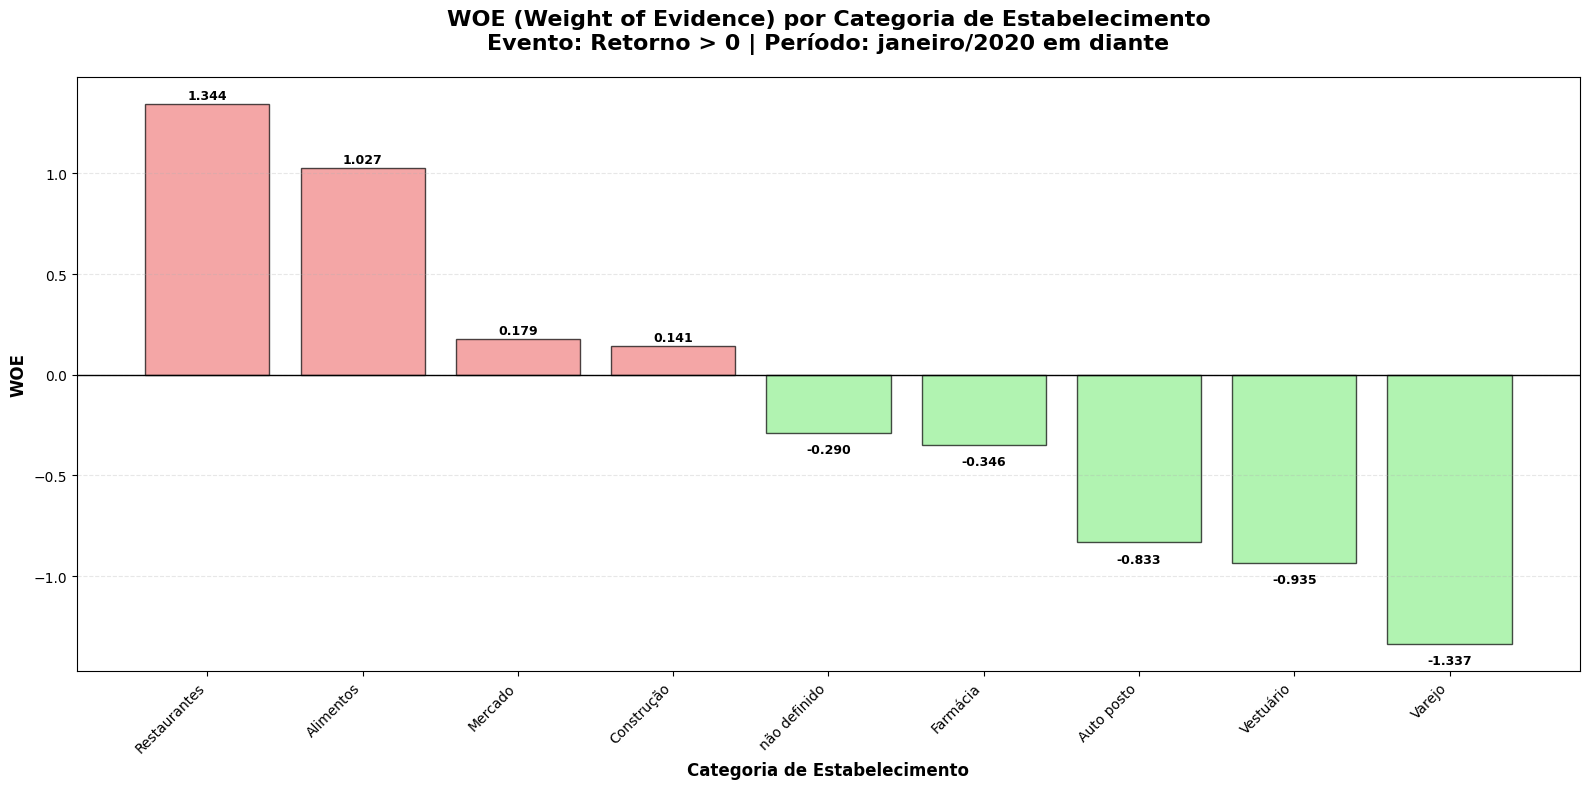

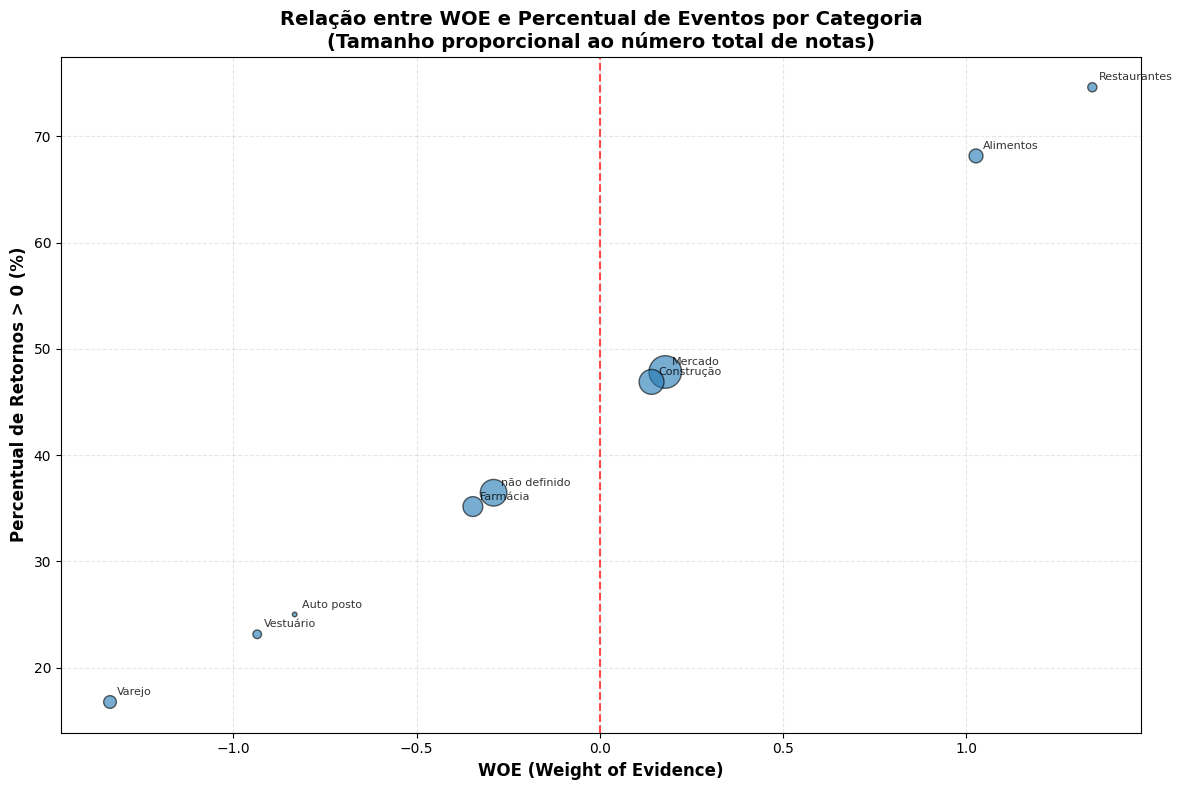

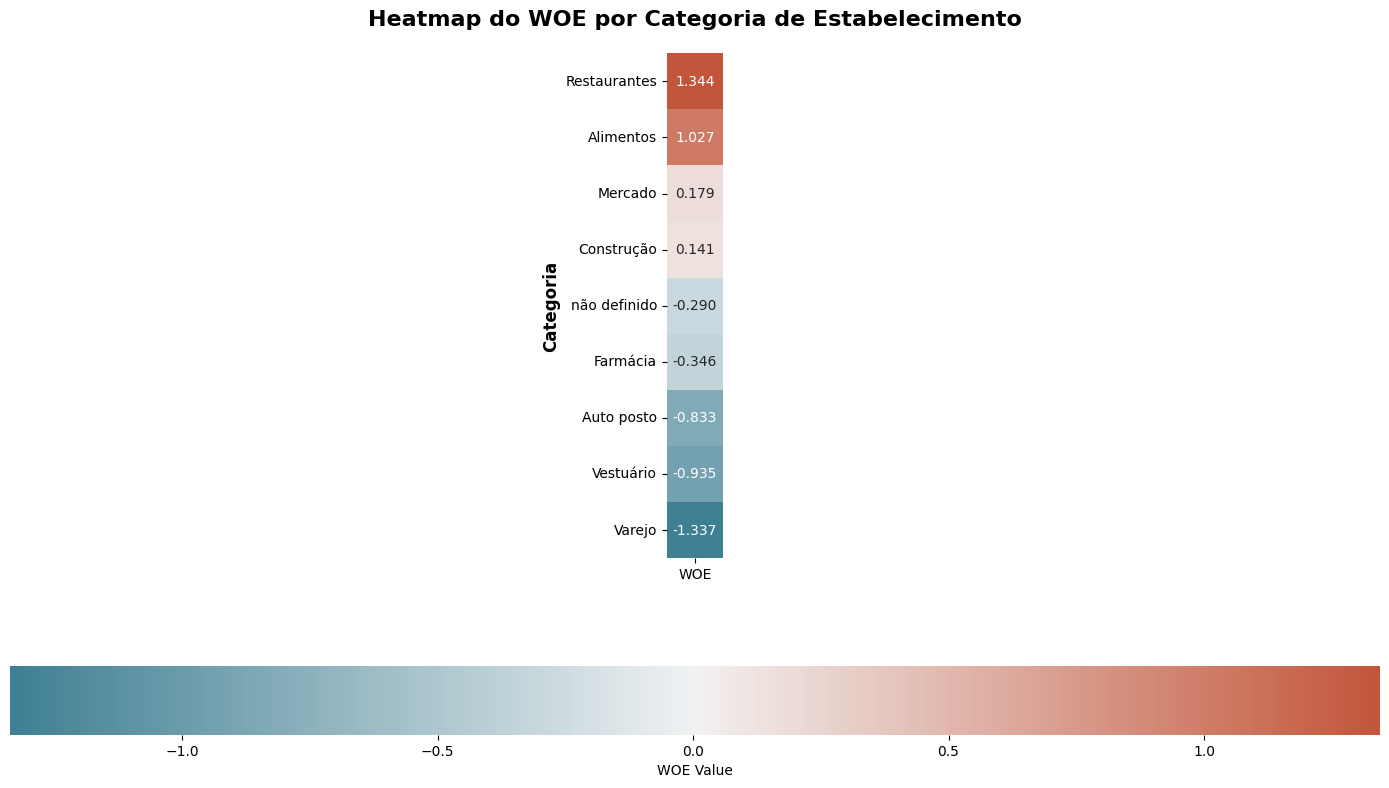

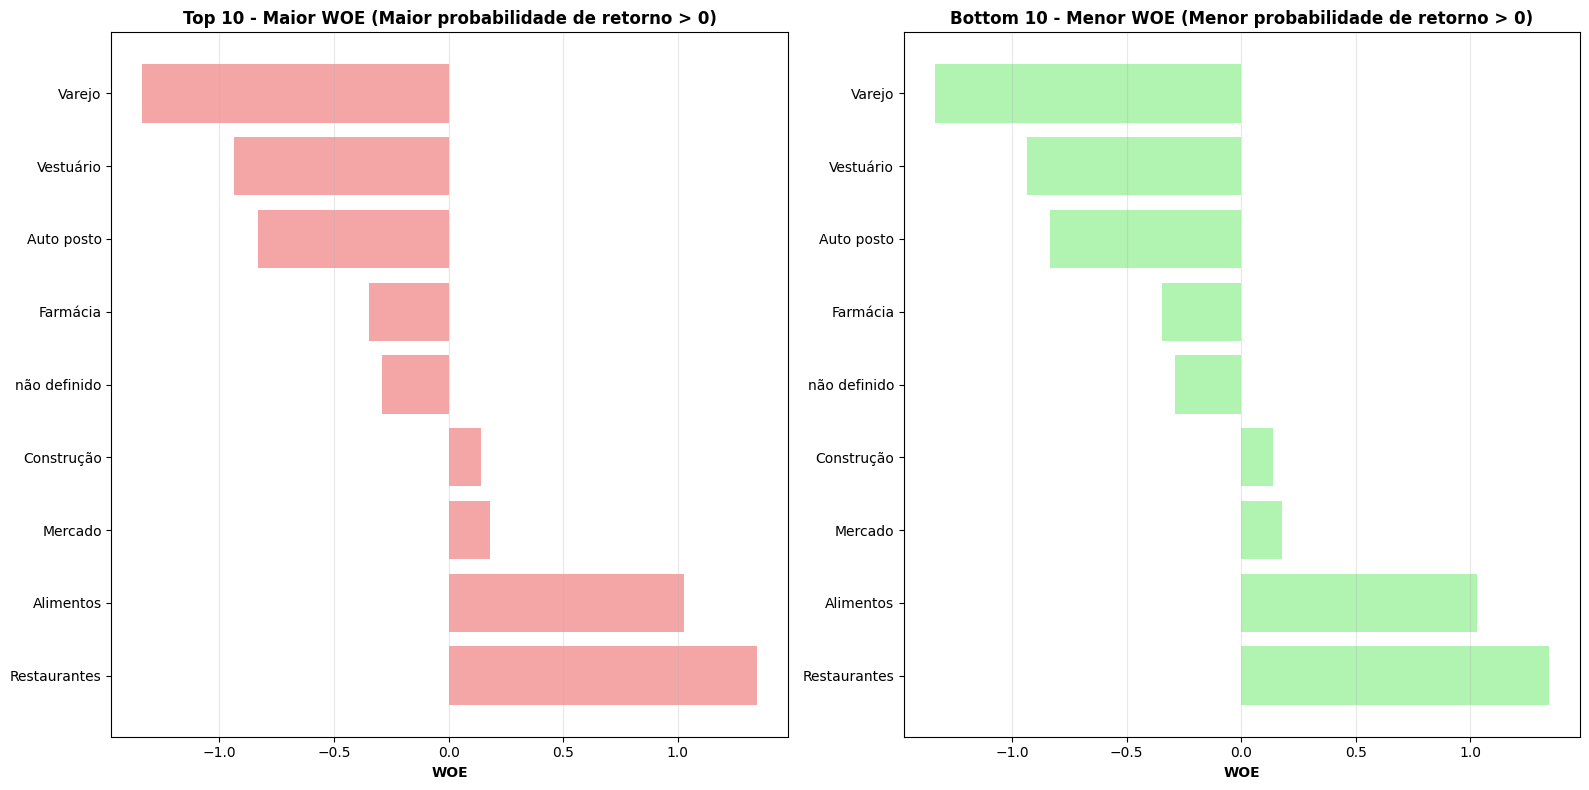


INTERPRETAÇÃO DO WOE:
WOE > 0: Categoria com maior probabilidade de retorno > 0
WOE < 0: Categoria com menor probabilidade de retorno > 0
WOE = 0: Probabilidade neutra

Categorias com WOE mais positivo (maior risco):
  Restaurantes: WOE = 1.344
  Alimentos: WOE = 1.027
  Mercado: WOE = 0.179
  Construção: WOE = 0.141
  não definido: WOE = -0.290

Categorias com WOE mais negativo (menor risco):
  não definido: WOE = -0.290
  Farmácia: WOE = -0.346
  Auto posto: WOE = -0.833
  Vestuário: WOE = -0.935
  Varejo: WOE = -1.337


In [8]:
df = pd.read_pickle('base_nfp.pkl')

df = df[df['Data Emissão'] >= '2020-01-01']

def interpretar_iv(iv):
    if iv < 0.02:
        return "Poder preditivo muito fraco"
    elif iv < 0.1:
        return "Poder preditivo fraco"
    elif iv < 0.3:
        return "Poder preditivo médio"
    elif iv < 0.5:
        return "Poder preditivo forte"
    else:
        return "Poder preditivo muito forte"

def calculate_woe(df, categoria_col, target_col):
    woe_df = df.groupby(categoria_col)[target_col].agg([
        ('total', 'count'),
        ('eventos', lambda x: (x > 0).sum()),
        ('nao_eventos', lambda x: (x <= 0).sum())
    ]).reset_index()
    
    total_eventos = woe_df['eventos'].sum()
    total_nao_eventos = woe_df['nao_eventos'].sum()
    
    woe_df['pct_eventos'] = woe_df['eventos'] / total_eventos
    woe_df['pct_nao_eventos'] = woe_df['nao_eventos'] / total_nao_eventos
    
    woe_df['WOE'] = np.log(woe_df['pct_eventos'] / woe_df['pct_nao_eventos'])
    
    woe_df['WOE'] = woe_df['WOE'].replace([np.inf, -np.inf], 0)
    
    woe_df['IV'] = (woe_df['pct_eventos'] - woe_df['pct_nao_eventos']) * woe_df['WOE']
    
    return woe_df

woe_resultados = calculate_woe(df, 'categoria', 'Retorno')

woe_resultados = woe_resultados.sort_values('WOE', ascending=False)

print("ANÁLISE WOE (WEIGHT OF EVIDENCE) POR CATEGORIA")
print("Evento: Retorno > 0 | Período: janeiro/2020 em diante")
print("=" * 100)
print(woe_resultados.to_string(index=False))
print("=" * 100)

total_iv = woe_resultados['IV'].sum()
print(f"\nESTATÍSTICAS RESUMIDAS:")
print(f"Total Information Value (IV): {total_iv:.4f}")
print(f"Interpretação do IV: {interpretar_iv(total_iv)}")
print(f"Categoria com maior WOE: {woe_resultados.iloc[0]['categoria']} (WOE: {woe_resultados.iloc[0]['WOE']:.4f})")
print(f"Categoria com menor WOE: {woe_resultados.iloc[-1]['categoria']} (WOE: {woe_resultados.iloc[-1]['WOE']:.4f})")

plt.figure(figsize=(16, 8))
bars = plt.bar(woe_resultados['categoria'], woe_resultados['WOE'], 
               color=np.where(woe_resultados['WOE'] > 0, 'lightcoral', 'lightgreen'),
               edgecolor='black', alpha=0.7)

plt.title('WOE (Weight of Evidence) por Categoria de Estabelecimento\nEvento: Retorno > 0 | Período: janeiro/2020 em diante', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoria de Estabelecimento', fontsize=12, fontweight='bold')
plt.ylabel('WOE', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.05),
             f'{height:.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(woe_resultados['WOE'], 
                     woe_resultados['eventos'] / woe_resultados['total'] * 100,
                     s=woe_resultados['total']/50,
                     alpha=0.6, edgecolors='black')

plt.title('Relação entre WOE e Percentual de Eventos por Categoria\n(Tamanho proporcional ao número total de notas)', 
          fontsize=14, fontweight='bold')
plt.xlabel('WOE (Weight of Evidence)', fontsize=12, fontweight='bold')
plt.ylabel('Percentual de Retornos > 0 (%)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')

plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)

for i, row in woe_resultados.iterrows():
    plt.annotate(row['categoria'], 
                (row['WOE'], row['eventos']/row['total']*100),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
woe_pivot = woe_resultados.set_index('categoria')['WOE']

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(woe_pivot.to_frame(), 
            annot=True, 
            fmt='.3f', 
            cmap=cmap,
            center=0,
            cbar_kws={'label': 'WOE Value', 'orientation': 'horizontal'},
            square=True)

plt.title('Heatmap do WOE por Categoria de Estabelecimento', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Categoria', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

top_10_woe = woe_resultados.head(10)
bottom_10_woe = woe_resultados.tail(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

bars1 = ax1.barh(top_10_woe['categoria'], top_10_woe['WOE'], color='lightcoral', alpha=0.7)
ax1.set_title('Top 10 - Maior WOE (Maior probabilidade de retorno > 0)', fontsize=12, fontweight='bold')
ax1.set_xlabel('WOE', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

bars2 = ax2.barh(bottom_10_woe['categoria'], bottom_10_woe['WOE'], color='lightgreen', alpha=0.7)
ax2.set_title('Bottom 10 - Menor WOE (Menor probabilidade de retorno > 0)', fontsize=12, fontweight='bold')
ax2.set_xlabel('WOE', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETAÇÃO DO WOE:")
print("=" * 80)
print("WOE > 0: Categoria com maior probabilidade de retorno > 0")
print("WOE < 0: Categoria com menor probabilidade de retorno > 0")
print("WOE = 0: Probabilidade neutra")
print("\nCategorias com WOE mais positivo (maior risco):")
for _, row in woe_resultados.head(5).iterrows():
    print(f"  {row['categoria']}: WOE = {row['WOE']:.3f}")

print("\nCategorias com WOE mais negativo (menor risco):")
for _, row in woe_resultados.tail(5).iterrows():
    print(f"  {row['categoria']}: WOE = {row['WOE']:.3f}")

categorias_poucos_dados = woe_resultados[woe_resultados['total'] < 100]
if not categorias_poucos_dados.empty:
    print(f"\n⚠️  CATEGORIAS COM POUCOS DADOS (<100 notas):")
    print("=" * 50)
    for _, row in categorias_poucos_dados.iterrows():
        print(f"  {row['categoria']}: {row['total']} notas (WOE: {row['WOE']:.3f})")

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [9]:
df = pd.read_pickle('base_nfp.pkl')

df = df[df['Data Emissão'] >= '2020-01-01']

def calculate_woe_iv(df, categoria_col, target_col):
    woe_df = df.groupby(categoria_col)[target_col].agg([
        ('total', 'count'),
        ('eventos', lambda x: (x > 0).sum()),
        ('nao_eventos', lambda x: (x <= 0).sum())
    ]).reset_index()
    
    total_eventos = woe_df['eventos'].sum()
    total_nao_eventos = woe_df['nao_eventos'].sum()
    
    woe_df['pct_eventos'] = woe_df['eventos'] / total_eventos
    woe_df['pct_nao_eventos'] = woe_df['nao_eventos'] / total_nao_eventos
    
    woe_df['WOE'] = np.log(woe_df['pct_eventos'] / woe_df['pct_nao_eventos'])
    
    woe_df['WOE'] = woe_df['WOE'].replace([np.inf, -np.inf], 0)
    
    woe_df['IV'] = (woe_df['pct_eventos'] - woe_df['pct_nao_eventos']) * woe_df['WOE']
    
    return woe_df

woe_resultados = calculate_woe_iv(df, 'categoria', 'Retorno')

total_iv = woe_resultados['IV'].sum()

def interpretar_iv(iv):
    if iv < 0.02:
        return "Poder preditivo muito fraco"
    elif iv < 0.1:
        return "Poder preditivo fraco"
    elif iv < 0.3:
        return "Poder preditivo médio"
    elif iv < 0.5:
        return "Poder preditivo forte"
    else:
        return "Poder preditivo muito forte"

print("CÁLCULO DO INFORMATION VALUE (IV)")
print("=" * 50)
print(f"Variável analisada: categoria")
print(f"Evento: Retorno > 0")
print(f"Período: janeiro/2020 em diante")
print("=" * 50)
print(f"Information Value (IV) total: {total_iv:.6f}")
print(f"Interpretação: {interpretar_iv(total_iv)}")
print("=" * 50)

print("\nDETALHAMENTO POR CATEGORIA:")
print("=" * 80)
print(woe_resultados[['categoria', 'total', 'eventos', 'pct_eventos', 'pct_nao_eventos', 'WOE', 'IV']].to_string(index=False))

print(f"\nIV TOTAL DA VARIÁVEL 'categoria': {total_iv:.6f}")

woe_resultados = woe_resultados.sort_values('IV', ascending=False)

print("\nTOP 5 CATEGORIAS QUE MAIS CONTRIBUEM PARA O IV:")
print("=" * 60)
for i, row in woe_resultados.head().iterrows():
    print(f"{row['categoria']}: IV = {row['IV']:.6f}")

print(f"\nSoma do IV das top 5 categorias: {woe_resultados.head()['IV'].sum():.6f}")
print(f"Percentual do IV total: {(woe_resultados.head()['IV'].sum() / total_iv * 100):.1f}%")

CÁLCULO DO INFORMATION VALUE (IV)
Variável analisada: categoria
Evento: Retorno > 0
Período: janeiro/2020 em diante
Information Value (IV) total: 0.240964
Interpretação: Poder preditivo médio

DETALHAMENTO POR CATEGORIA:
   categoria  total  eventos  pct_eventos  pct_nao_eventos       WOE       IV
   Alimentos   5050     3442     0.092234         0.033031  1.026895 0.060796
  Auto posto    540      135     0.003618         0.008319 -0.832779 0.003916
  Construção  16044     7523     0.201592         0.175034  0.141265 0.003752
    Farmácia  10189     3582     0.095986         0.135718 -0.346375 0.013762
     Mercado  27553    13177     0.353100         0.295304  0.178746 0.010331
Restaurantes   2179     1626     0.043571         0.011359  1.344354 0.043304
      Varejo   4182      701     0.018785         0.071505 -1.336733 0.070473
   Vestuário   1915      443     0.011871         0.030237 -0.934974 0.017172
não definido  18348     6689     0.179243         0.239493 -0.289780 0.017459

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<div style="color: red; background-color: #f0f0f0; padding: 10px; border-left: 4px solid blue;">
Poder Preditivo: Médio (IV = 0.241)

CATEGORIAS DE ALTO RISCO:

Restaurantes: 74.6% de retorno positivo

Alimentos: 68.2% de retorno positivo

Mercado: 47.8% de retorno positivo

CATEGORIAS DE BAIXO RISCO:

Varejo: 13.8% de retorno positivo

Vestuário: 23.1% de retorno positivo

Auto Posto: 25.0% de retorno positivo

RECOMENDAÇÕES:

Foco imediato em Restaurantes e Alimentos

Investigar causas dos retornos elevados nessas categorias

Monitorar continuamente categorias de alto risco

Manter boas práticas das categorias de baixo risco

CONCLUSÃO: Existe disparidade significativa no comportamento das categorias, necessitando de ações específicas por segmento.</div>
